In [718]:
import pandas as pd

# Load the data
data_path = "/Users/michael/Desktop/SpringData2024-main/data/regression/final_all_entries_filtered_counties_parishes.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,geotype,geoid,geoname,varname,x2010,x2011,x2012,x2013,x2014,x2015,...,x2017,x2018,x2019,x2020,x2021,x2022,x2023,State,Cluster,area_type
0,county,22025,"Catahoula Parish, Louisiana",co2limits,NaN,NaN,NaN,NaN,56.0,NaN,...,NaN,57.49,53.98,54.48,52.31,NaN,NaN,LA,1.0,rural
1,county,22071,"Orleans Parish, Louisiana",co2limits,NaN,NaN,NaN,NaN,68.0,NaN,...,NaN,79.12,77.10,77.45,75.54,NaN,NaN,LA,1.0,urban
2,county,28049,"Hinds County, Mississippi",co2limits,NaN,NaN,NaN,NaN,58.0,NaN,...,NaN,72.37,68.94,69.36,69.18,NaN,NaN,MS,1.0,urban
3,county,28055,"Issaquena County, Mississippi",co2limits,NaN,NaN,NaN,NaN,55.0,NaN,...,NaN,63.40,60.60,60.13,59.33,NaN,NaN,MS,1.0,rural
4,county,41051,"Multnomah County, Oregon",co2limits,NaN,NaN,NaN,NaN,76.0,NaN,...,NaN,77.96,76.33,76.65,76.12,NaN,NaN,OR,2.0,urban


In [719]:
# Select only the yearly data columns for correlation analysis
yearly_data = data.loc[:, 'x2010':'x2023']

# Calculate the correlation matrix
correlation_matrix = yearly_data.corr()

correlation_matrix

,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022,x2023
x2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2014,NaN,NaN,NaN,NaN,1.000000,NaN,0.761829,NaN,0.825646,0.838193,0.870077,0.837788,NaN,NaN
x2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2016,NaN,NaN,NaN,NaN,0.761829,NaN,1.000000,NaN,0.969855,0.968453,0.934812,0.960615,NaN,NaN
x2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2018,NaN,NaN,NaN,NaN,0.825646,NaN,0.969855,NaN,1.000000,0.979312,0.968676,0.972905,0.959525,0.972182
x2019,NaN,NaN,NaN,NaN,0.838193,NaN,0.968453,NaN,0.979312,1.000000,0.982493,0.982548,0.961550,0.974377


In [720]:
# Identify the unique variables within 'varname' to find the ones related to CO2 and oil
unique_variables = data['varname'].unique()
unique_variables

array(['co2limits', 'drilloffshore'], dtype=object)

In [721]:
# Reorganize the data to have variables as columns for each year

# Pivot the dataset to get 'co2limits' and 'drilloffshore' as columns for each year
pivoted_data = data.pivot(index=['geoid', 'geoname', 'State', 'Cluster', 'area_type'], 
                          columns=['varname', 'geotype'], 
                          values=[f'x{year}' for year in range(2010, 2024)])

# Flatten the MultiIndex columns after pivoting
pivoted_data.columns = ['_'.join(col).strip() for col in pivoted_data.columns.values]

# Now calculate the correlation matrix for each year across the two variables, assuming this restructure aligns with the user's intent
correlation_matrices = {}

# We'll focus on the most recent 6 full years, assuming data availability might be an issue for 2023 based on the initial data examination
for year in range(2017, 2023):
    year_columns = [col for col in pivoted_data.columns if col.endswith(str(year))]
    correlation_matrices[year] = pivoted_data[year_columns].corr()

correlation_matrices[2017]  # Display one example matrix to check the structure

""


In [722]:
# Adjusting the strategy to ensure correct identification and correlation of the variables across the desired time frame.
# The goal is to create a data structure where each year and each variable (co2limits and drilloffshore) is a column.

# First, let's simplify the process by focusing on creating a dataframe with 'year', 'variable', and 'value' columns.

# Melting the dataset to get a long format
data_long = pd.melt(data, id_vars=['geoid', 'geoname', 'State', 'Cluster', 'area_type', 'varname'], 
                    value_vars=[f'x{year}' for year in range(2010, 2024)], 
                    var_name='year', value_name='value')

# Now, filter out rows with NaN values since they can't contribute to correlation calculations
data_long = data_long.dropna(subset=['value'])

# To calculate correlation between different variables across years, 
# we need to ensure that we compare like with like - in this case, 
# we're interested in correlations within the same geographic area across different years.
# This involves a more complex aggregation or comparison than initially outlined.

# Since the direct approach led to confusion, let's reevaluate how to achieve the desired correlations.
# A clarification might be needed regarding the expectation for "correlation between different variables across years" 
# in the context of this dataset, as typically, correlations are computed between different numerical columns in a single dataframe.

# For now, let's display a small subset of the long-format data to reassess our approach.
data_long.head()

,geoid,geoname,State,Cluster,area_type,varname,year,value
96,22025,"Catahoula Parish, Louisiana",LA,1.0,rural,co2limits,x2014,56.0
97,22071,"Orleans Parish, Louisiana",LA,1.0,urban,co2limits,x2014,68.0
98,28049,"Hinds County, Mississippi",MS,1.0,urban,co2limits,x2014,58.0
99,28055,"Issaquena County, Mississippi",MS,1.0,rural,co2limits,x2014,55.0
100,41051,"Multnomah County, Oregon",OR,2.0,urban,co2limits,x2014,76.0


In [723]:
# Convert 'year' to a more usable format by removing 'x' prefix
data_long['year'] = data_long['year'].str.replace('x', '').astype(int)

# Pivot the data to have 'geoid', 'geoname', 'State', 'Cluster', 'area_type', and 'year' as index,
# and variables as columns
pivot_data = data_long.pivot_table(index=['geoid', 'geoname', 'State', 'Cluster', 'area_type', 'year'], 
                                   columns='varname', 
                                   values='value').reset_index()

# Now calculate the correlation across the entire dataset between 'co2limits' and 'drilloffshore'
correlation_matrix = pivot_data[['co2limits', 'drilloffshore']].corr()

correlation_matrix

varname,co2limits,drilloffshore
varname,,
co2limits,1.000000,-0.785622
drilloffshore,-0.785622,1.000000


In [724]:
# Load the data from each file to examine their structures
final_all_entries = pd.read_csv('/Users/michael/Desktop/SpringData2024-main/data/regression/final_all_entries_filtered_counties_parishes.csv')
renewable_energy_difference = pd.read_csv('/Users/michael/Desktop/SpringData2024-main/data/regression/renewable_energy_difference.csv')
sentiment_regress = pd.read_csv('/Users/michael/Desktop/SpringData2024-main/data/regression/sentiment_regress.csv')
socio_regress = pd.read_csv('/Users/michael/Desktop/SpringData2024-main/data/regression/socio_regress.csv')

# Show the first few rows of each dataframe to understand their structures
(
    final_all_entries.head(),
    renewable_energy_difference.head(),
    sentiment_regress.head(),
    socio_regress.head()
)

(  geotype  geoid                        geoname    varname  x2010  x2011  \
 0  county  22025    Catahoula Parish, Louisiana  co2limits    NaN    NaN   
 1  county  22071      Orleans Parish, Louisiana  co2limits    NaN    NaN   
 2  county  28049      Hinds County, Mississippi  co2limits    NaN    NaN   
 3  county  28055  Issaquena County, Mississippi  co2limits    NaN    NaN   
 4  county  41051       Multnomah County, Oregon  co2limits    NaN    NaN   
 
    x2012  x2013  x2014  x2015  ...  x2017  x2018  x2019  x2020  x2021  x2022  \
 0    NaN    NaN   56.0    NaN  ...    NaN  57.49  53.98  54.48  52.31    NaN   
 1    NaN    NaN   68.0    NaN  ...    NaN  79.12  77.10  77.45  75.54    NaN   
 2    NaN    NaN   58.0    NaN  ...    NaN  72.37  68.94  69.36  69.18    NaN   
 3    NaN    NaN   55.0    NaN  ...    NaN  63.40  60.60  60.13  59.33    NaN   
 4    NaN    NaN   76.0    NaN  ...    NaN  77.96  76.33  76.65  76.12    NaN   
 
    x2023  State Cluster  area_type  
 0    NaN 

In [725]:
# Combine datasets based on common identifier "State"
# First, ensure the socio_regress 'per_capita_income' column is numeric. It seems to be formatted as a string.

# Convert 'per_capita_income' to numeric after removing commas
socio_regress['per_capita_income'] = socio_regress['per_capita_income'].str.replace(',', '').astype(float)
socio_regress['Carpool_Estimate'] = socio_regress['Carpool_Estimate'].str.replace(',', '').astype(float)
socio_regress['Self-Employ_Estimate'] = socio_regress['Self-Employ_Estimate'].str.replace(',', '').astype(float)
socio_regress['Social_Security_Estimate'] = socio_regress['Social_Security_Estimate'].str.replace(',', '').astype(float)

# Now, merge the datasets based on the "State" column
combined_data = pd.merge(renewable_energy_difference, sentiment_regress, on='State', how='inner')
combined_data = pd.merge(combined_data, socio_regress, on='State', how='inner')

combined_data = combined_data.drop('State', axis=1)

combined_data.head()

# We will not include 'final_all_entries' in the merge due to its different structure (time-series data by counties)
# and lack of direct 'State' column for a straightforward merge.

# Calculate the correlation matrix for the combined dataset
correlation_matrix = combined_data.corr()

correlation_matrix

,percentage_renewable_produced,percentage_renewable_consumed,difference,Drill,co2,drill_diff,co2_diff,per_capita_income,Poverty_Percentage,Unemployment_Rate,Carpool_Estimate,mean_travel_time_to_work,Married_Percent,Self-Employ_Estimate,Social_Security_Estimate,Education_Estimate
percentage_renewable_produced,1.000000,0.892009,0.602428,-0.308269,-0.010137,-0.308269,-0.010137,0.045618,-0.201092,-0.378767,-0.127828,-0.374536,-0.182911,-0.069839,-0.220517,-0.171106
percentage_renewable_consumed,0.892009,1.000000,0.176582,-0.226694,-0.060126,-0.226694,-0.060126,-0.057005,-0.202394,-0.439537,-0.143006,-0.380085,-0.200047,-0.099031,-0.200953,-0.189397
difference,0.602428,0.176582,1.000000,-0.270970,0.084097,-0.270970,0.084097,0.199994,-0.080499,-0.048645,-0.025831,-0.144412,-0.045054,0.022792,-0.125341,-0.038152
Drill,-0.308269,-0.226694,-0.270970,1.000000,-0.745235,1.000000,-0.745235,-0.736364,0.441581,-0.145678,-0.202980,-0.441051,0.355313,-0.224511,-0.175224,-0.248989
co2,-0.010137,-0.060126,0.084097,-0.745235,1.000000,-0.745235,1.000000,0.751687,-0.326539,0.317089,0.244140,0.720142,-0.374344,0.250339,0.305389,0.404635
drill_diff,-0.308269,-0.226694,-0.270970,1.000000,-0.745235,1.000000,-0.745235,-0.736364,0.441581,-0.145678,-0.202980,-0.441051,0.355313,-0.224511,-0.175224,-0.248989
co2_diff,-0.010137,-0.060126,0.084097,-0.745235,1.000000,-0.745235,1.000000,0.751687,-0.326539,0.317089,0.244140,0.720142,-0.374344,0.250339,0.305389,0.404635
per_capita_income,0.045618,-0.057005,0.199994,-0.736364,0.751687,-0.736364,0.751687,1.000000,-0.508731,0.127882,0.056496,0.514762,-0.609744,0.081863,0.043515,0.189702
Poverty_Percentage,-0.201092,-0.202394,-0.080499,0.441581,-0.326539,0.441581,-0.326539,-0.508731,1.000000,0.529440,0.051939,0.014459,0.843596,0.046882,0.098035,-0.002777
Unemployment_Rate,-0.378767,-0.439537,-0.048645,-0.145678,0.317089,-0.145678,0.317089,0.127882,0.529440,1.000000,0.232482,0.553512,0.484112,0.223833,0.261249,0.258425


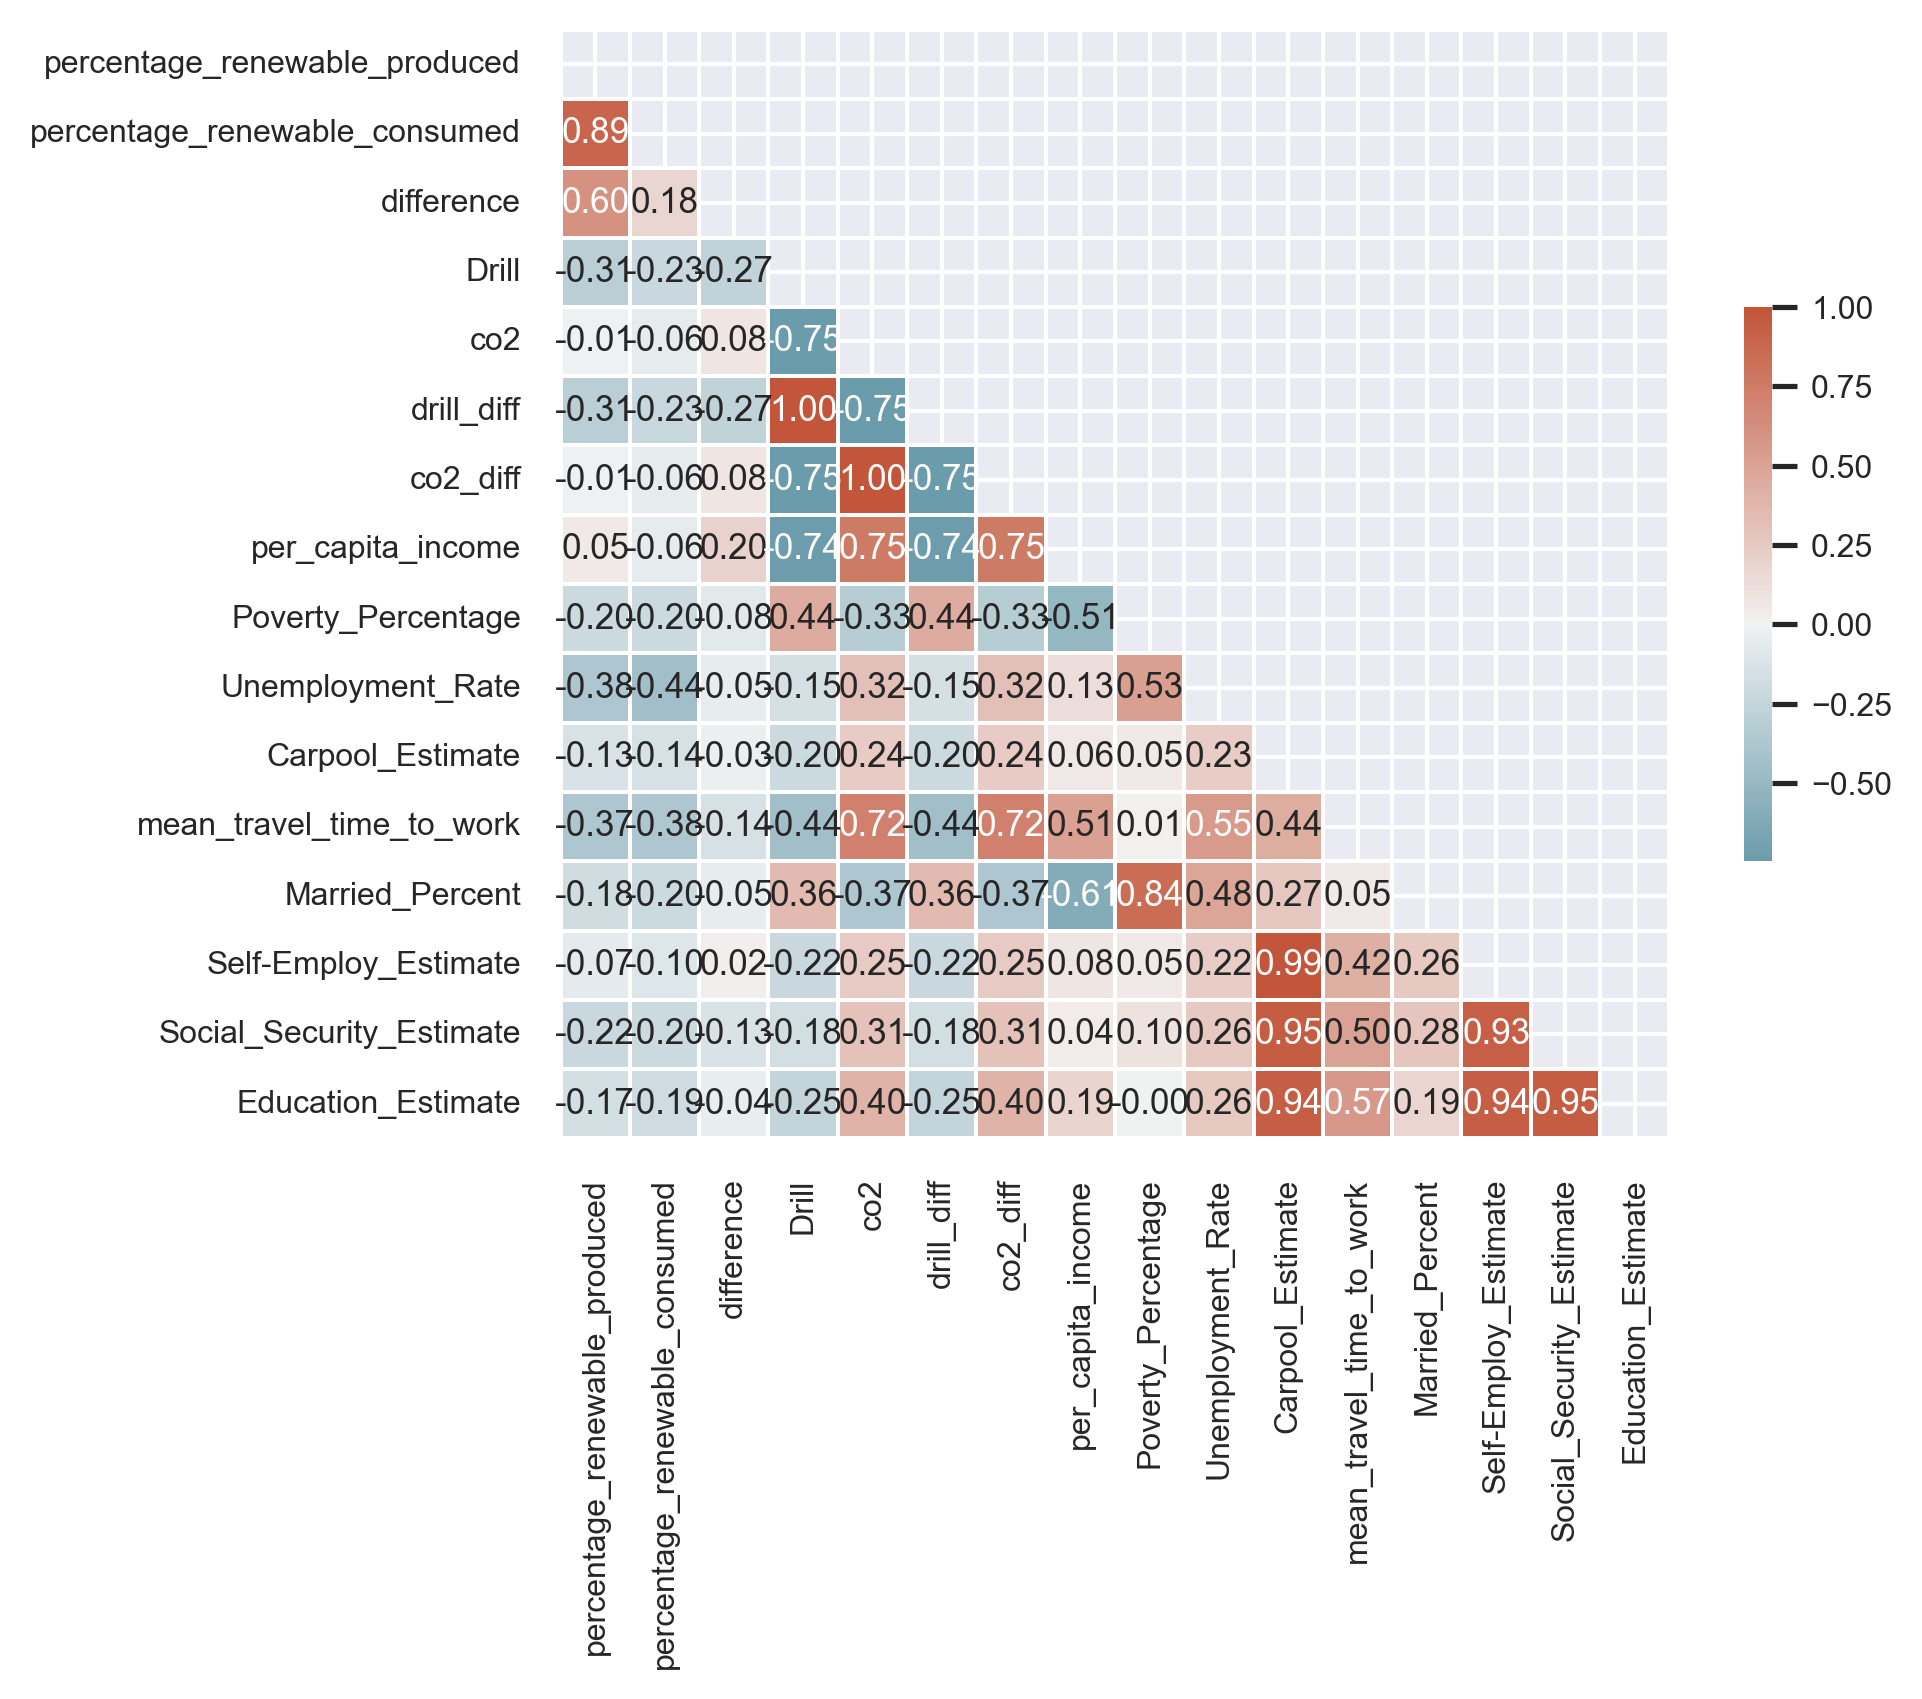

In [726]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Your existing code
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()

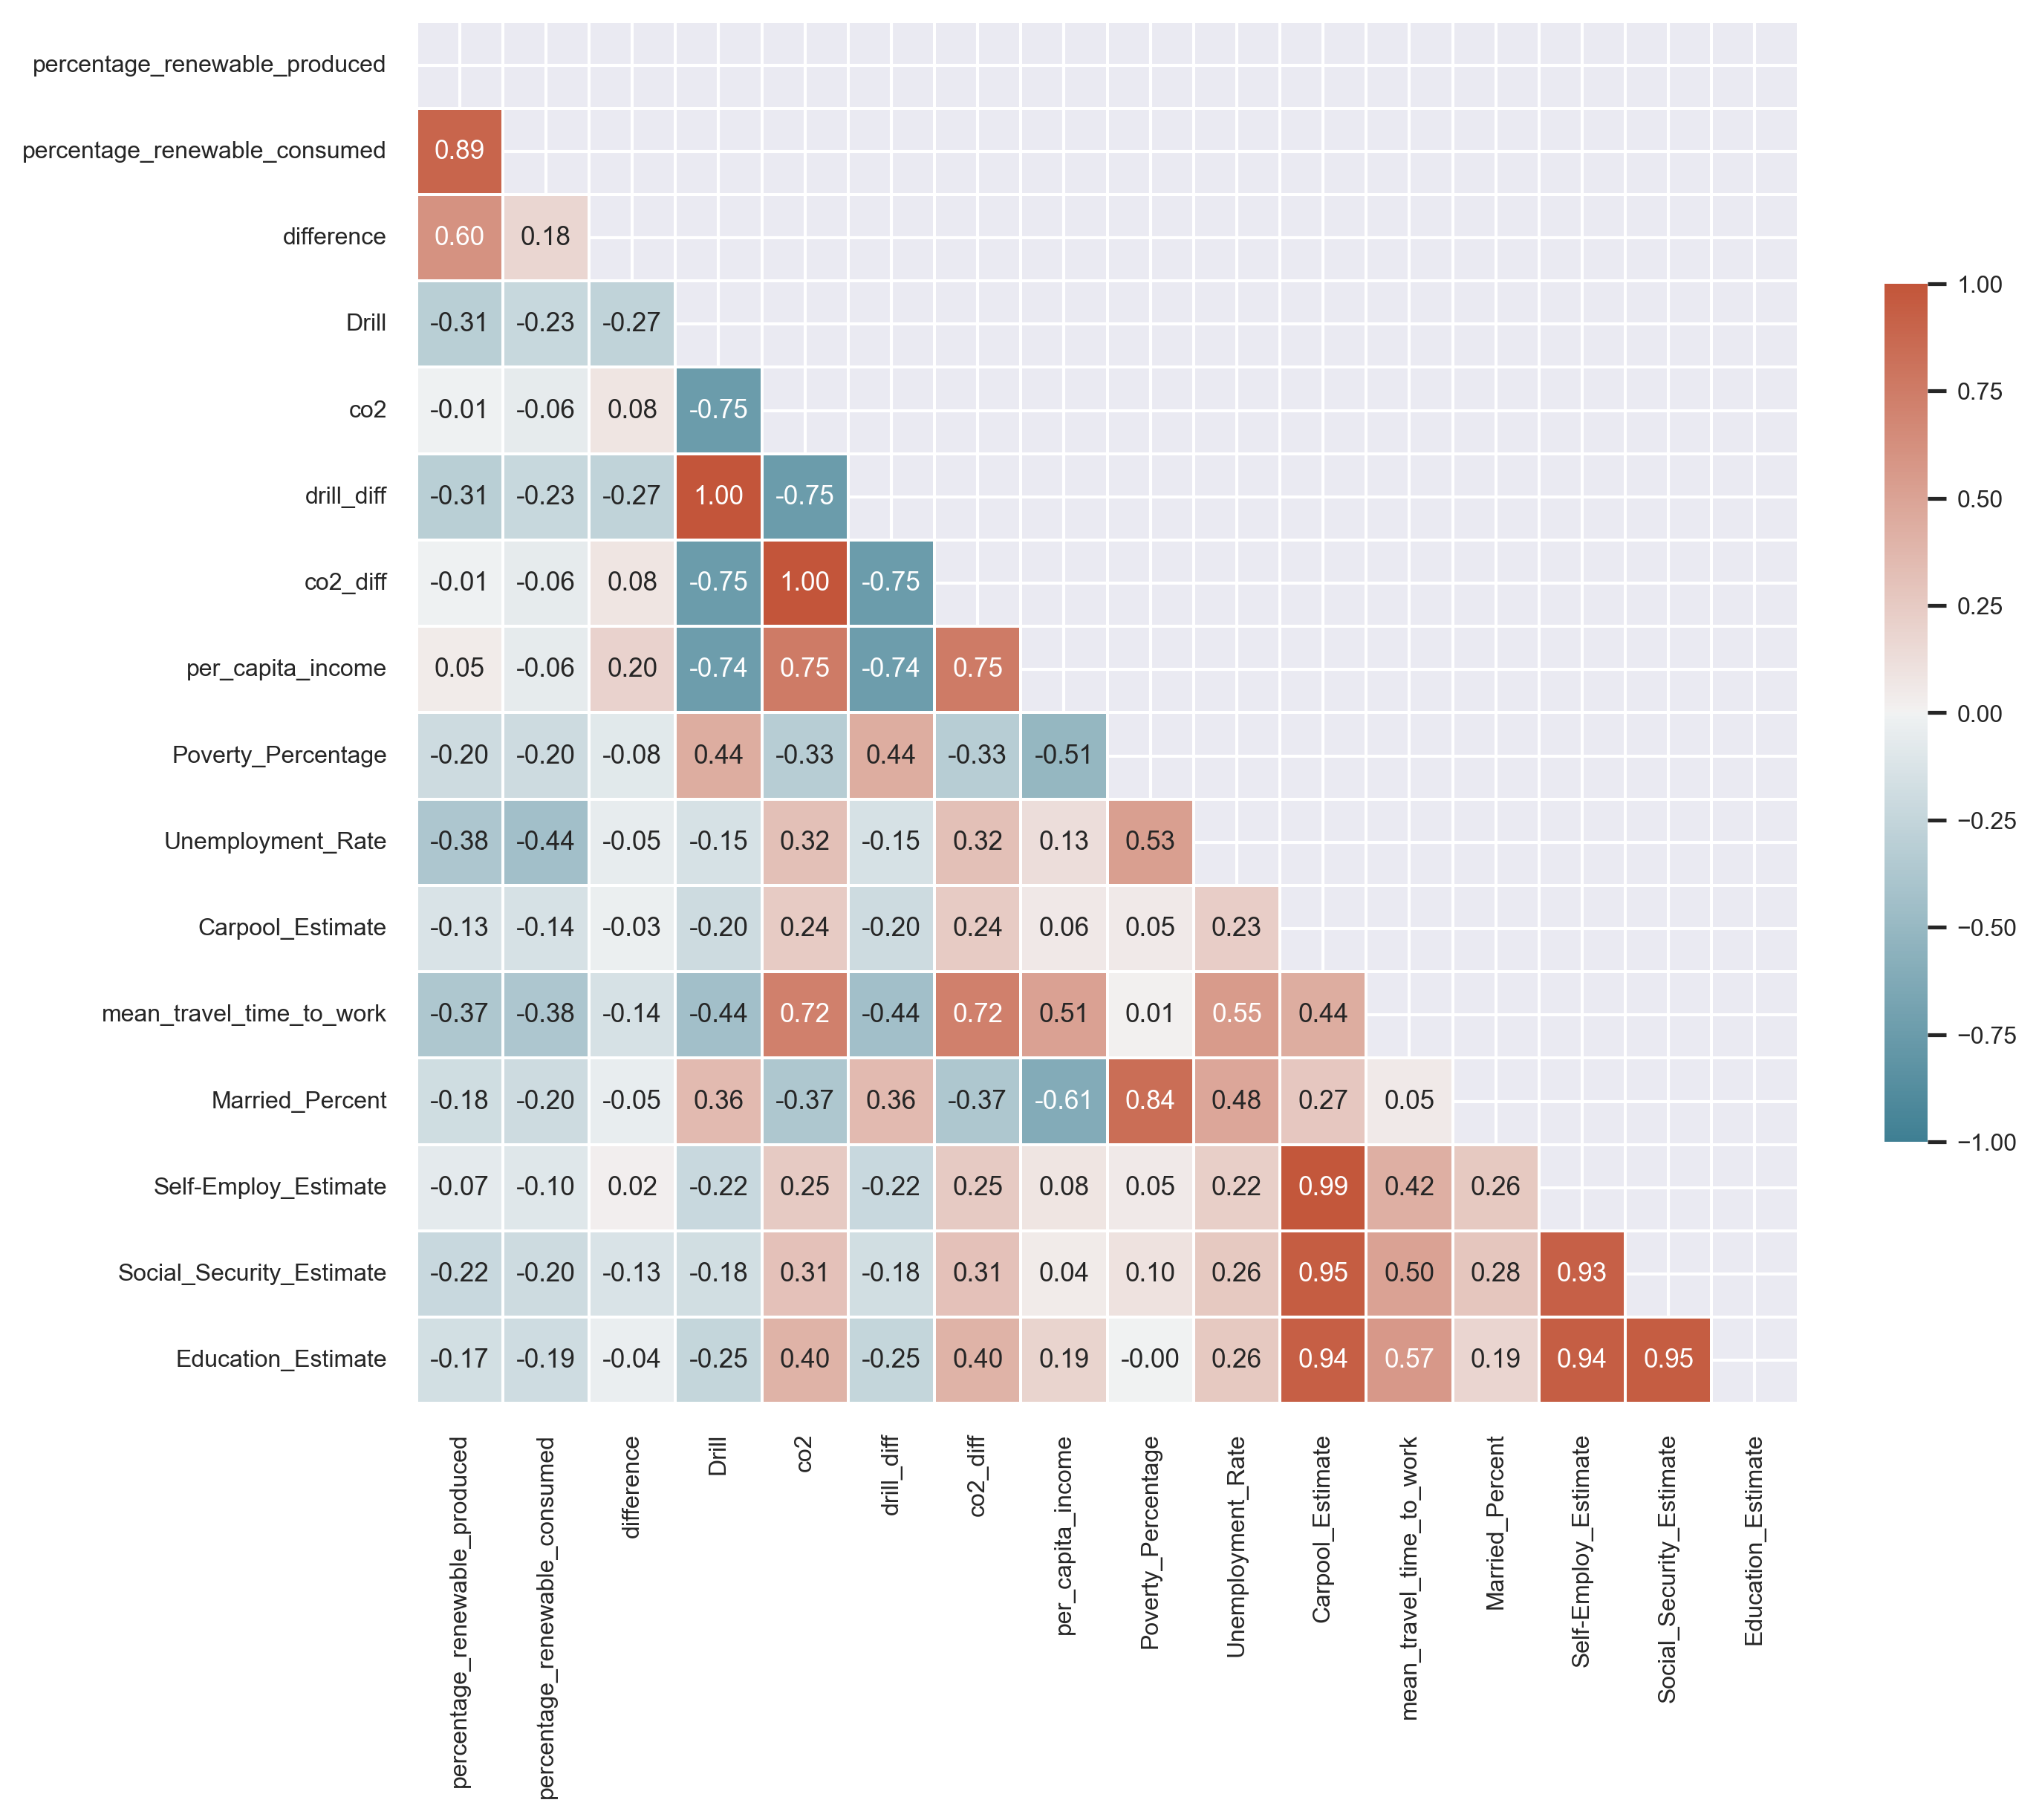

In [727]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 300

# Set the font scale smaller
sns.set(font_scale=0.7)

# Create a larger figure
plt.figure(figsize=(10, 10))

# Your existing code
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()

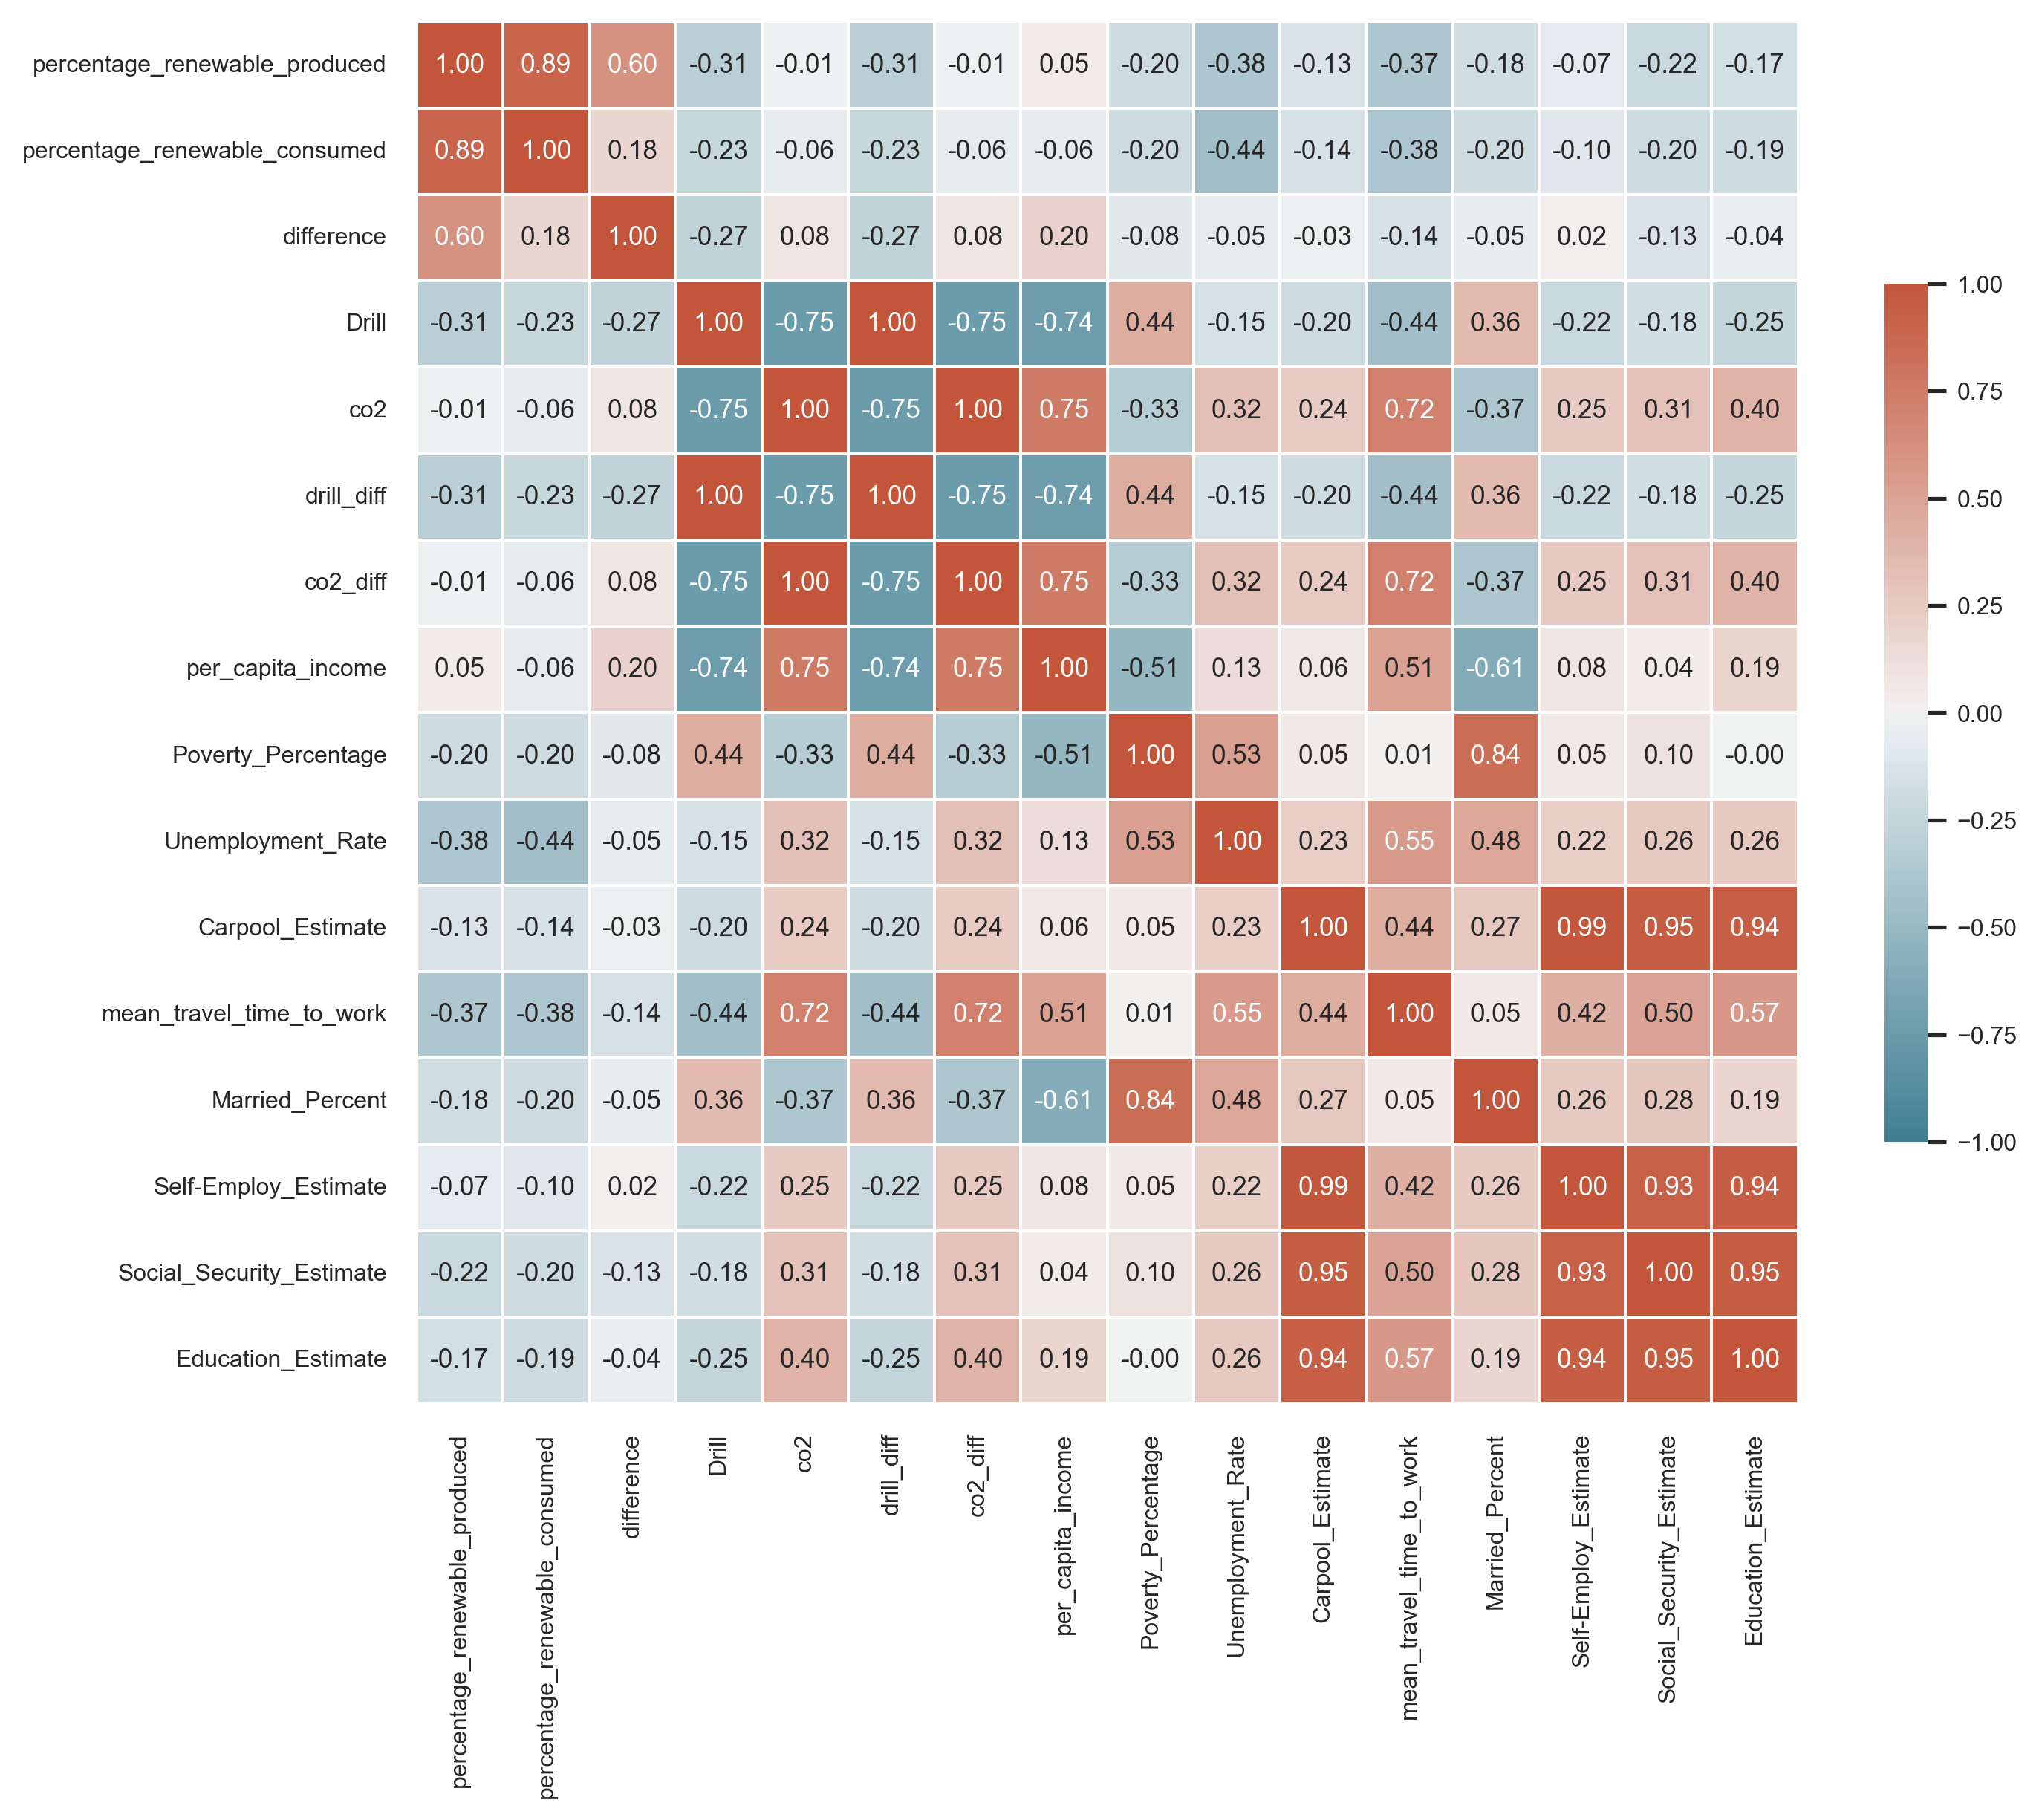

In [729]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 300

# Set the font scale smaller
sns.set(font_scale=0.7)

# Create a larger figure
plt.figure(figsize=(10, 10))

# Your existing code
sns.heatmap(correlation_matrix, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()